In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Adult Salary.csv")
df.head()

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. Carry out missing value analysis on “Workclass” variable and treat them (if any) using appropriate methods. 

In [3]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [4]:
df["Workclass"].replace(' ?', np.nan, inplace=True)

In [5]:
df["Workclass"].isnull().sum()

1836

In [6]:
df["Workclass"] = df["Workclass"].fillna(df["Workclass"].mode()[0])

In [7]:
df["Workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

2. Visualize the income-wise average working hours on the grounds of race.  

<AxesSubplot:xlabel='Income', ylabel='hours-per-week'>

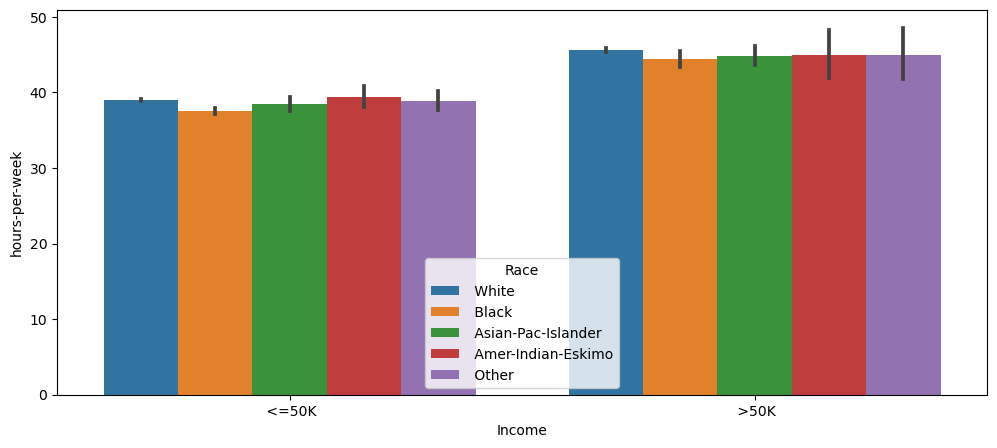

In [8]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Income", y="hours-per-week", hue="Race", estimator=np.mean)

3. Display the income and education wise count of the individuals.

In [9]:
us_ed = pd.crosstab(df["Education"], df["Income"])
us_ed

Income,<=50K,>50K
Education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


4. How is marital status and income group correlated? Which relationship status has highest number of >50k salaried individuals? 

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

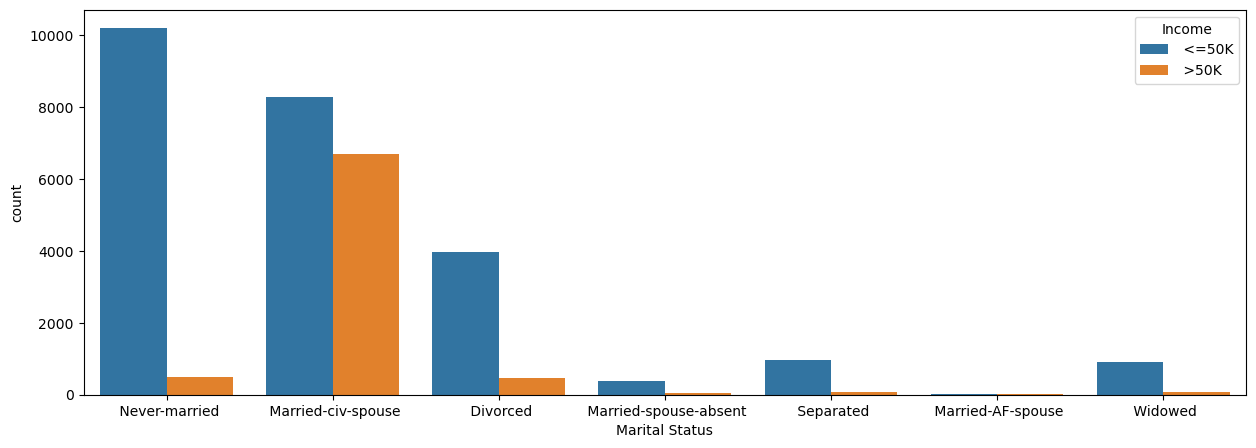

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="Marital Status", hue="Income")

"Married-civ-spouse" is the category with the highest number of highly paid individuals.

5. Does race have any impact on the working hours put in by the people?

<AxesSubplot:xlabel='Race', ylabel='hours-per-week'>

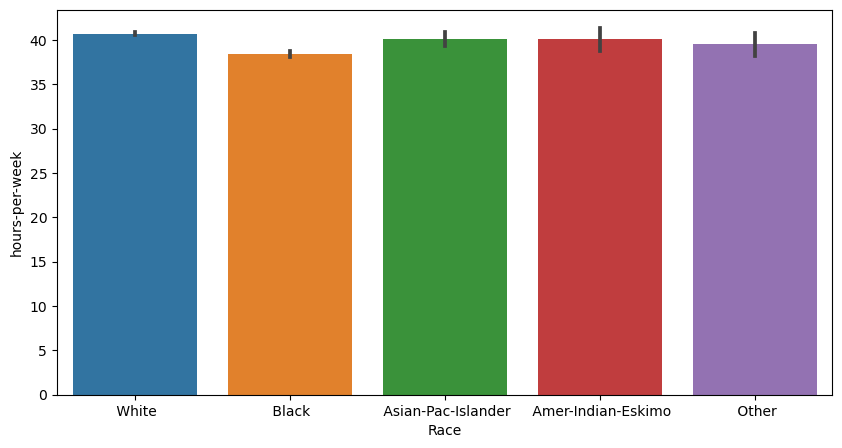

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Race", y="hours-per-week", estimator=np.mean)

There does not appear to be a huge influence of race on average the hours put in.